I sudy the [Kaggle Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), and to do so I follow Aurelien Geron's checklist from his book, [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?qid=1643446257&refinements=p_27%3AAurelien+Geron&s=books&sr=1-1). I, however, make changes to the list in, in part D for example. 

# A) Frame the Problem and Look at the Big Picture 


## <font color='blue'>1. Define the objectives in the business terms </font> 

From Kaggle :

"With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home."

"It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable."


So, this is a price prediction competition, and we want to be accurate. 


## <font color='blue'>2. How will your solution be used? </font>

Well, it is just a competition!


## <font color='blue'>3. What are the current solutions? </font>

This is not applicable here, but probably people have some intuition.

## <font color='blue'>4. How should you frame this problem? </font>

This, I believe is an important question. We need to predict a price for each home. We have a labeled dataset with the final price for each house. So it is a <font color='green'> Supervised Regression</font> task.  


## <font color='blue'>5. How should the performance be measured? </font>

This we can check from Kaggle:

"Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price."

So that is sth to consider: For each price vale $y$, we need to create $\ln(y)$, and set the metric to be RMSE. In the end, to report we need to exponentiate our final result. 


## <font color='blue'>6. Is the performance measure aligned with the business objective? </font>

Kaggle: 
"Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally."

Let's look at it. Say we have a house with the price $y_1 = 2 \times 10^5$ with the predicted value of $\hat{y}_1 = 1 \times 10^5$, and another with the price $y_2 = 3 \times 10^7$ with the predicted value of $\hat{y}_2 = 2 \times 10^7$. 

With the RMSE we have
$$
\begin{align}
\text{RMSE} &= \frac{1}{\sqrt{2}} \sqrt{\left[(y_1 -\hat{y}_1)^2 + (y_2 -\hat{y}_2)^2 \right]} \\
     & = \frac{1}{\sqrt{2}}  \sqrt{\left[10^{10} + 10^{14} \right] } \\
     & \approx \frac{1}{\sqrt{2}} \sqrt{10^{14}} \\
     & = \frac{1}{\sqrt{2}} 10^7 \\ 
     & \approx 7.0 \times 10^6 \ .
\end{align}
$$
As we see, although we both prices were off by $50 \%$, the error in the cheaper house is negligible next to the error of the expensive one. 

By taking the $\ln$, however,
$$
\begin{align}
\text{RM-Log-SE} &= \frac{1}{\sqrt{2}} {\left[(\ln(y_1) -\ln(\hat{y}_1))^2 + (\ln(y_2) -\ln(\hat{y}_2))^2 \right]} \\
     & = \frac{1}{\sqrt{2}}  \sqrt{\left[ ( \ln(2 \times 10^5)  -\ln(10^5) )^2 +( \ln(3 \times 10^7)  -\ln(2 \times 10^7) )^2 \right] } \\ 
     & = \frac{1}{\sqrt{2}}  \sqrt{\left[ ( \ln 2 )^2 + (\ln 3  -\ln 2)^2 \right] } \\
     & \approx \frac{1}{\sqrt{2}}  \sqrt{\left[ 0.48^2 + 0.16^2 \right] } \\
     & \approx 0.57 \ .
\end{align}
$$

The most important feature of this measure is that by taking the $\ln$ the order of magintude disapper and we left with the logarithm of the prefactors, 
$$
\ln(x \times 10^n) - \ln(y \times 10^n) = \ln(x) - \ln(y) \ .
$$
In this sense Kaggle is right that by taking the logarithm they are all "equal" in our measure and more importantly contribute to the total error.  Hence this is a good measure.


## <font color='blue'>7. What would be the minimum performance needed to reach the business objective? </font>

Again, this is not applicable here. So as low as possible.

## <font color='blue'>8. What are comparable problems? Can you reuse experience or tools?</font>

YES, YES :) Geron studies a housing price problem in chapter 2 of the book, which I will follow. But I will probably use some other regression methods like SVM and Decision Trees. I will also try to study the problem using a Neural Network.


## <font color='blue'>9. Is human experience avaiable?</font>

In a real setup this could be available, but here nope! 

## <font color='blue'>10. How would you solve the problem manually? </font>

I may look at the a few house around the one I am interested in and find the average price per square meter and multiply it with the area. Though this is quite rough! 

## <font color='blue'>11. List the assumptions you (or others) have made so far. </font>

Nothing special so far, let's see what comes up.

## <font color='blue'>12. Verify assumptions if possible.</font>

No need right now. 


OK, Good to go to the next section of the List. 

#  B) Get the Data 


## <font color='blue'>1. List the data you need and how much you need.</font>

We need a training set and test set so we can predict. 

## <font color='blue'> 2. Find and document where you can get that data.</font>

One can get the data from this [page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) on Kaggle.

## <font color='blue'> 3. Check how much space it will take.</font>

Train and test take less than a MB. 

##  <font color='blue'> 4. Check legal obligations, and get authorization if necessary.</font>

Kaggle: 
"The Ames Housing dataset was compiled by Dean De Cock for use in data science education."
The original paper by De Cock can be found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). 

From the Kaggle, and the paper it looks like fine to download it and use it. 


##  <font color='blue'> 5. Get access authorizations.</font>

Looks fine here, we have it on our machine.


##  <font color='blue'> 6. Create a workspace (with enough storage space)</font>

This is fine with us. 

##  <font color='blue'>7. Get the data. </font>

OK, finally we start coding. 

In [1]:
# I put all the modules or other necessary settings here

import sys
assert sys.version_info >= (3, 5)
import numpy as np
import pandas as pd
import os
import copy
import timeit


import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

# some plot settings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Some pandas setting

pd.set_option('display.max_rows', 100)

In [2]:
# this is for B7, get the data

kaggle_train_data = pd.read_csv("train.csv")
kaggle_test_data = pd.read_csv("test.csv")

## <font color='blue'> 8. Convert the data to a format you can easily manipulate (without changing the data itself)</font>

We can read the csv file. So no further action. 

## <font color='blue'> 9. Ensure sensitive info. is deleted or protected. </font>

This is fine.

## <font color='blue'> 10. Check the size and the type of data (time series, sample, geographical,etc)</font>

We know we have a data set where each house has a set of features and a salesprice. Some of these features are numerical and some are . We go through each feature in section C.


## <font color='blue'> 11. Sample a test set, put it aside, and never look at it (no data snooping!) </font>

We read the test set that Kaggle provided as Kaggle_test_data. This can be seen as deploying section of final model. We do, however, need a test set to check how good our model is **befor deploying**, and for that below we will seprate a part.  

Geron creates a test set for the housing problem using a `StratifiedShuffleSplit` to make the test set meaningful. We will do so.  


# C) Explore the Data

## <font color='blue'> 1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary)</font>

The size is fine and manageable. For the moment there is no need to copy, but we will do so before applying necessary transformations for data cleaning or processing. 

## <font color='blue'> 2. Create a Jupyter notebook to keep a record of your data exploration.</font>

In this case we are working in J.N., hence no need to do so, but if one wants to use usual scripts and launch the code on a server, the exploration should be done separately. 

## <font color='blue'> 3. Study each attribute and its characteristics: </font>
 - Name
 - Type (Cateorical, int/float, bounded/unbounded, text, structured, etc)
 - % of missing values 
 - Noisiness and type of noise (stochastic, outliers,rounding errors, etc)
 - Usefulness for the task
 - Type of distribution (Gaussian, uniform,logarithmic, etc)

First let's look at the `head()`

In [3]:
kaggle_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We know that there are 79 features. In addition, we have and "id" and "SalePrice", so in total 81 columns. `head()` shows the first 5. 

And get the `info()` to see the name and type of attributes. We also have an accompanied text file on the attributes. 

In [4]:
kaggle_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Most of the data points have a value for all features, but there are null values. We will study the percentage when we want to do the data cleaning. We will also check what we want to keep.

## <font color='blue'> 4. For supervised learning tasks, identify the target attribute(s). </font>

This we know, it is called "SalePrice". 

<font color='red'> Note that here we need to take the Log of the price!!! </font>

## <font color='blue'> 5. Visualize the data. </font>

This could be very useful in some cases, but even in the case that Geron studied, I dis't get that much info except sth like "Coser to the coast, higher the price" makes sense. But this could be really useful to indentify outliers. 

## <font color='blue'> 6. Study the correlations between attributes. </font>

We can of course get a huge correlation matrix, $80 \times 80$, but how useful the full matric is I don't know. The correlations of the "SalesPrice" is, however, quite important because it's our target. 

In [5]:
kaggle_train_data.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OK, looks like the attribute "OverallQual" is the most important one. Well, we know that the correlation matrix does not capture everything, but in this case it also makes sense that the "OverallQual", described as "Rates the overall material and finish of the house" in the accompanied text file, has an importatn role on the final price. So we use it for the `StratifiedShuffleSplit`.  

## <font color='blue'> B11) Test set split</font>

We have 1460 data points. So let's choose 260 of them as our test set. We may later divide the 1200 to train and dev set, or use kfold cross-validation.  Let's write a function to give us either nomal train-test split or the stratified one. 

In [6]:
def select_train_test(data_set, test_size=0.2,stratified=False, strat_atr=None):
    """
    returns train and test sets depending on the method one uses. 
    the default is the train_test_split. 
    With stratified=True, one needs to give a string to strat_atr to be used for the stratified selection.
    """
    if stratified:
        split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
        for train_index, test_index in split.split(data_set, data_set[strat_atr]):
            to_return_train_set = data_set.loc[train_index]
            to_return_test_set = data_set.loc[test_index]
    else:
        to_return_train_set, to_return_test_set = train_test_split(data_set, test_size=test_size, random_state=42,shuffle=True)
    
    return to_return_train_set,to_return_test_set

In [7]:
train_data,test_data = select_train_test(kaggle_train_data,test_size=260,stratified=True,strat_atr="OverallQual")

## <font color='blue'> 7. Identify the promising transformations you may want to apply.</font>

For prepaing data we need to apply a few of course, since there are categorical ones. 

## <font color='blue'> 8. Identify extra data that would be useful.</font>

This I don't know right now. 

## <font color='blue'> 9. Document what you have learned.</font>

That's what we are doing in this notebook, but one can also write a note. 

We have a supervised regression task. I am just worried that if we want to keep all the features and transform the categorical ones to vectors, it would be many features. But let's see. We may need to come back. 

# D) Prepare the Data

(Here I deviate a bit from Geron's list and follows chapter 2. One needs to pay attention to categorical attributes and pipelines.)

 - Work on copies of data. 
 - Write functions for all the data transformations

## <font color='blue'> 1. Take a copy of train data which prepared so far.</font>

I use deepcopy, to keep the original intact.

In [8]:
cp_kaggle_train = copy.deepcopy(kaggle_train_data)

cp_train = copy.deepcopy(train_data)
cp_test = copy.deepcopy(test_data)

## <font  color='blue'> 2. For the case of Supervised learning separate the target and features.</font>

In [9]:
full_kaggle_train_X = cp_kaggle_train.drop(["SalePrice","Id"],axis=1)
X_cp_train = cp_train.drop(["SalePrice","Id"],axis=1)
X_cp_test  = cp_test.drop(["SalePrice","Id"],axis=1)

# Due to the metric by Kaggle we take the logarithm of the price
full_kaggle_train_Y = np.log(cp_kaggle_train["SalePrice"])
Y_cp_train = np.log(cp_train["SalePrice"])
Y_cp_test  = np.log(cp_test["SalePrice"])

In [10]:
X_cp_train.shape

(1200, 79)

Note that I also dropped "Id", because it is not a feature! 

## <font  color='blue'> 3. Separate numerical and categorical features.</font>

Separation can be easily done using `select_dtypes()`. 

In [11]:
X_cp_num = X_cp_train.select_dtypes(exclude=['object'])
X_cp_cat = X_cp_train.select_dtypes(include=['object'])

X_cp_num.shape, X_cp_cat.shape

((1200, 36), (1200, 43))

## <font color='blue'> 4. Data cleaning, engineering and scaling. </font>
 
 1) Fix or remove outliers. 
 
 2) Select the features and drop the attributes that provide no useful info. 
 
 **Using PCA could be helpful to select a reasonanle subspace.**
 
 3) Filling the missing values or drop their columns (or rows)
 
 4) Engineer new data.
 
 5) Scale the data. 
 
 
 I will write some function with starting with `dc_expl_`. Later I write Classes, so that we can use two pipelines for numerical and categorical values and later combine them.  


Let's first go through the numerical ones:

How many NaN or null do we have? 

In [12]:
X_cp_num.isna().sum()

MSSubClass         0
LotFrontage      210
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [13]:
cp_train["SalePrice"].corr(cp_train["LotFrontage"]), cp_train["SalePrice"].corr(cp_train["GarageYrBlt"])

(0.3714721372486478, 0.4872951814522071)

These are considerable and we need to keep them. They are also quite close to those we had for the Kaggle train set. 

Most of the data points have a value for all the numerical features, but there are null values. Let's write a function to count the `NaN` values in each column, and give us back dictionaies. We will get two dictionaries. One dictionary for the columns which should be dropped, since there are a lot of `NaN`s, and another for the columns which should be kept and taken care of. 

### <font color='red'>Important </font>

Here, I make an assumption or basically *add a hyperparameter* to the model. To determine whether we should keep a column or throw it away we need a criteria. The criteria is as follows: 

We keep a column if `NaN`s compose less than $30\%$ of it. Otherwise we drop that column.  

In [14]:
def dc_expl_keep_or_throw_away(data_set,ratio=0.3):
    """
    return the list of columns which should be kept and 
    a dictionary of the columns with a percentage of NaNs more than the ratio. 
    """
    threshold = int(ratio * data_set.shape[0])
    clmn_names = data_set.columns
    
    to_be_kept = []
    to_be_dropped_dict = {}
    
    for cl in clmn_names:
        nan_count = data_set[cl].isna().sum()
        if nan_count < threshold:
            to_be_kept.append(cl)
        else:
            to_be_dropped_dict[cl] = nan_count
                
    return to_be_kept,to_be_dropped_dict   

In [15]:
num_attr_list, dropped_num = dc_expl_keep_or_throw_away(X_cp_num)
len(num_attr_list),X_cp_num.shape,dropped_num

(36, (1200, 36), {})

So here we see that we should keep all the numerical values, and the line below is not necessary, but in general we need it.

In [16]:
X_train_num_kept = X_cp_num[num_attr_list]

Now we fill the missing values: 

In [17]:
dc_expl_imputer = SimpleImputer(strategy="median")

In [18]:
num_X= dc_expl_imputer.fit_transform(X_train_num_kept)

# And to make it a data frame again

X_num_prep =pd.DataFrame(num_X,columns=X_train_num_kept.columns,index = X_train_num_kept.index)

In [19]:
X_num_prep.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [20]:
X_num_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 27 to 159
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1200 non-null   float64
 1   LotFrontage    1200 non-null   float64
 2   LotArea        1200 non-null   float64
 3   OverallQual    1200 non-null   float64
 4   OverallCond    1200 non-null   float64
 5   YearBuilt      1200 non-null   float64
 6   YearRemodAdd   1200 non-null   float64
 7   MasVnrArea     1200 non-null   float64
 8   BsmtFinSF1     1200 non-null   float64
 9   BsmtFinSF2     1200 non-null   float64
 10  BsmtUnfSF      1200 non-null   float64
 11  TotalBsmtSF    1200 non-null   float64
 12  1stFlrSF       1200 non-null   float64
 13  2ndFlrSF       1200 non-null   float64
 14  LowQualFinSF   1200 non-null   float64
 15  GrLivArea      1200 non-null   float64
 16  BsmtFullBath   1200 non-null   float64
 17  BsmtHalfBath   1200 non-null   float64
 18  FullBath

Let's see how whether we can reduce it's dimenion:

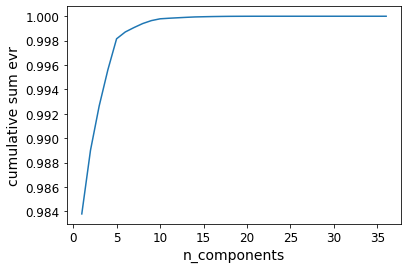

In [21]:
pca=PCA()
pca.fit(num_X)
evr_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.linspace(1,len(evr_cumsum),num=len(evr_cumsum)),evr_cumsum)
plt.xlabel("n_components")
plt.ylabel("cumulative sum evr")
plt.show()

In [22]:
evr_cumsum

array([0.98378738, 0.98900472, 0.99264167, 0.99560909, 0.99814994,
       0.99870971, 0.99907065, 0.9993996 , 0.99964204, 0.99978901,
       0.99983527, 0.99987325, 0.99990988, 0.99994252, 0.99995914,
       0.99997374, 0.99998449, 0.99999289, 0.99999624, 0.99999842,
       0.99999987, 0.99999994, 0.99999996, 0.99999997, 0.99999998,
       0.99999999, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Already the first one is $98 \%$ ! That is a lot! So we don't need to keep many other features as it may cause overfitting.

Good! There is no null value anymore. 

Let's see what should be kept from the categorical ones

In [23]:
cat_attr_list, dropped_cat = dc_expl_keep_or_throw_away(X_cp_cat)
len(cat_attr_list),X_cp_cat.shape,dropped_cat

(38,
 (1200, 43),
 {'Alley': 1126,
  'FireplaceQu': 555,
  'PoolQC': 1194,
  'Fence': 959,
  'MiscFeature': 1158})

Ok, 5 features had a lot of NaNs and were dropped. 

In [24]:
X_train_cat_kept = X_cp_cat[cat_attr_list]

Let's fill the rest of NaN:

In [25]:
cat_dc_exp_imputer = SimpleImputer(strategy="most_frequent")


cat_X= cat_dc_exp_imputer.fit_transform(X_train_cat_kept)

# And to make it a data frame again

X_cat_prep =pd.DataFrame(cat_X,columns=X_train_cat_kept.columns,index = X_train_cat_kept.index)

In [26]:
X_cat_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 27 to 159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1200 non-null   object
 1   Street         1200 non-null   object
 2   LotShape       1200 non-null   object
 3   LandContour    1200 non-null   object
 4   Utilities      1200 non-null   object
 5   LotConfig      1200 non-null   object
 6   LandSlope      1200 non-null   object
 7   Neighborhood   1200 non-null   object
 8   Condition1     1200 non-null   object
 9   Condition2     1200 non-null   object
 10  BldgType       1200 non-null   object
 11  HouseStyle     1200 non-null   object
 12  RoofStyle      1200 non-null   object
 13  RoofMatl       1200 non-null   object
 14  Exterior1st    1200 non-null   object
 15  Exterior2nd    1200 non-null   object
 16  MasVnrType     1200 non-null   object
 17  ExterQual      1200 non-null   object
 18  ExterCond      1200 non-null

In [27]:
cat_hot_enc = OneHotEncoder()

X_cat_enc = cat_hot_enc.fit_transform(X_cat_prep)

X_cat_enc.shape[1]

230

So we now have $230$ features from the categorical attributes! But This is not necessary useful. Because For instance "Street" attribute has two possibilities, but most of the data are "Pave" meaning paved based on the accompanied text file:

In [28]:
np.mean(X_cat_prep["Street"]=="Pave")

0.9975

The same could happen in the other features. We can go through it all the features and see what is relevant to keep and what to drop. But it is better to automize it. Here we can use **PCA** to select good and reasonable subspace of the data, but since the data is sprase we need **TruncatedSVD**:

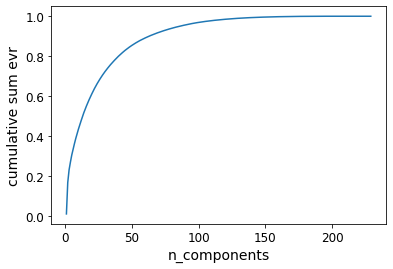

In [29]:
tsvd_cat = TruncatedSVD(n_components=X_cat_enc.shape[1]-1,n_iter=10)
tsvd_cat.fit(X_cat_enc)
#tsvd_cat.explained_variance_ratio_
evr_cumsum = np.cumsum(tsvd_cat.explained_variance_ratio_)
plt.plot(np.linspace(1,len(evr_cumsum),num=len(evr_cumsum)),evr_cumsum)
plt.xlabel("n_components")
plt.ylabel("cumulative sum evr")
plt.show()

In [30]:
dim_reduced = np.argmax(evr_cumsum>=0.95) + 1
dim_reduced

86

In [31]:
opt_tsvd = TruncatedSVD(n_components = dim_reduced,n_iter=10,random_state=42)

X_cat_projected = opt_tsvd.fit_transform(X_cat_enc)

type(X_cat_projected)

numpy.ndarray

In [32]:
type(X_num_prep)

pandas.core.frame.DataFrame

In [33]:
type(X_cat_enc)

scipy.sparse.csr.csr_matrix

We can in the end merge the two prepared numerical and categorical features and merge them as follows:

`np.c_[X_num_prep,X_cat_projected]`

But we will write a pipeline to automize everything and be able to feed it with new data. 

## <font color='blue'> 5. Summarize what you have learned and the steps for the pipelines. </font>

### Numerical :
   - For the numerical attributes we decided to keep `num_attr_list`. In this case it is basically all of the numerical attributes, but could have been different. This list will be feeded to the final `ColumnTransformer`.

   1) To fill the missing values we use the `median` strategy. This will be the first step of the `numerical_pipeline`.
   
   2) To reduce the dimension we add pca and just keep $1-5$ of them. 
    
   3) What we haven't done above is scaling. That should be done after filling the missing values, and since we have a regression task, it would be important and useful. 


### Categorical: 
   - For the numerical attributes we decided to keep `cat_attr_list`. In this case it has 5 less features than the original list. This list will be feeded to the final `ColumnTransformer`.

   1) To fill the missing values we use the `most_frequent` strategy.

   2) We use `OneHotEncoder` to change the categorical values to the vectors. It has a very large dimension, $220$.
   
   3) To reduce the dimension the OneHot outcome,vwe use `TruncatedSVD`. It would be handy to write this as a class.


## <font color='blue'> 6. Make the pipelines. </font>

### Numerical Pipeline: 

In [34]:
## to do some checks pca is not here!
v0_numerical_ppl = Pipeline([
    ('num_imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
]
)

### Categorical Pipeline:

To write this we first need to write the class for the dimensional reduction. We can give this two parameters: 
1) Whether to do it or not.
2) what should be the `explained_variance_ratio_`.

In [35]:
class CategoricalDimRed(BaseEstimator,TransformerMixin):
    
    def __init__(self,reduction_on=True,cum_evr=0.95):
        self.reduction_on = reduction_on
        self.cum_evr = cum_evr
        
    def fit(self,X,y=None):
        X_cp = copy.deepcopy(X)
        if self.reduction_on:
            tsvd= TruncatedSVD(n_components=X_cp.shape[1]-1,n_iter=10,random_state=42)
            tsvd.fit(X_cp)
            evr_cumsum = np.cumsum(tsvd.explained_variance_ratio_)
            subspace_dim = np.argmax(evr_cumsum>=self.cum_evr) +1 
            self.tsvd_ = TruncatedSVD(n_components = subspace_dim,n_iter=10,random_state=42)
            self.tsvd_.fit(X_cp)
        return self
    
    def transform(self,X):
        X_cp = copy.deepcopy(X)
        return self.tsvd_.transform(X_cp) if self.reduction_on else X_cp             

Let's check that it works: 

To compare and get the exact same result, one need to set the same random_state every where. 

In [36]:
test_cat =copy.deepcopy(X_cat_enc)
class_test = CategoricalDimRed()

output_test = class_test.fit_transform(test_cat)

We can now check the output type and chape and compare it with what we had in the previous section, namely `X_cat_projected`:

In [37]:
type(output_test),output_test.shape

(numpy.ndarray, (1200, 86))

In [38]:
X_cat_projected.shape

(1200, 86)

In [39]:
X_cat_projected==output_test

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

And now we can write our categorical pipeline:

In [40]:
v0_categorical_ppl = Pipeline([
    ('cat_imputer',SimpleImputer(strategy="most_frequent")),
    ('cat_onehot_enc',OneHotEncoder()),
    ('cat_dim_reduction',CategoricalDimRed())
]
)

###  <font color='blue'> And the V0_ full pipeline: </font> 

We will have variation of these pipelines later. 

In [41]:
v0_full_ppl=ColumnTransformer([
    ("numerical",v0_numerical_ppl,num_attr_list),
    ("categorical",v0_categorical_ppl,cat_attr_list)
]
)

Let's check it: 
(Note that in the previous section we didn't do the scaling, so here we have it)

In [42]:
dc_epl_X_final = np.c_[StandardScaler().fit_transform(X_num_prep),X_cat_projected]

In [43]:
test_full_ppl_output = v0_full_ppl.fit_transform(X_cp_train) 

In [44]:
test_full_ppl_output.shape,dc_epl_X_final.shape

((1200, 122), (1200, 122))

In [45]:
dc_epl_X_final==test_full_ppl_output

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

Fantastic:) We have a nice pipeline for our preprocessing and it works as it should. 

We haven't engineered any new feature, but we can add higher order polynomials of the numerics. But I want to add one thing, and that is scaling the categorical data after the truncation. The other thing is that there could be rare category values that haven't bben appeared in the training. We set `handle_unknown='ignore'`, so the OneHot Encoder attributes all zero to them. 

By try-and-error I also found that by reducing the number of features one get a better result, specially on the submission to Kaggle. So I add a dimensional 

1) Add pca() and keep a first few. 

2) for the categorical one we set a small `explained_variance_ratio`. 

Later we try to find a good number of components for pca and tsvd. 



###  <font color='blue'> And the V1_ full pipeline: </font> 


In [46]:
v1_numerical_ppl = copy.deepcopy(v0_numerical_ppl)

v1_categorical_ppl = Pipeline([
    ('cat_imputer',SimpleImputer(strategy="most_frequent")),
    ('cat_onehot_enc',OneHotEncoder(handle_unknown='ignore')),
    ('cat_dim_reduction',CategoricalDimRed(reduction_on=True,cum_evr=0.95)),
    ('cat_scaling',StandardScaler())    
]
)

v1_full_ppl=ColumnTransformer([
    ("numerical",v1_numerical_ppl,num_attr_list),
    ("categorical",v1_categorical_ppl,cat_attr_list)
]
)

##  <font color='blue'> 7. Prepare the train and test data to be feeded to models. </font> 


In [47]:
X_train_v1 =  v1_full_ppl.fit_transform(X_cp_train) 
X_test_v1 = v1_full_ppl.transform(X_cp_test)
X_full_v1 = v1_full_ppl.transform(full_kaggle_train_X)

Y_train = copy.deepcopy(Y_cp_train)
Y_test  = copy.deepcopy(Y_cp_test)
Y_full = copy.deepcopy(full_kaggle_train_Y)

# E) Shortlist Promising Models

- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests) 

- Once again, try to automate these steps as much as possible. 

##  <font color='blue'> 1. Train many quick-and-dirty models from different categories using standard parameters. </font> 

Ok, let's throw all that we know at it :) 

### i) Linear Regression


In [64]:
lin_reg = LinearRegression()
lin_reg_score = cross_val_score(lin_reg,X_full_v1,Y_full,scoring="neg_mean_squared_error",cv=10)
lin_reg_rmse_score = np.sqrt(-lin_reg_score)
lin_reg_rmse_score,np.mean(lin_reg_rmse_score),np.std(lin_reg_rmse_score)

(array([0.12865901, 0.11084789, 0.12072403, 0.17640911, 0.14587738,
        0.11112828, 0.13756127, 0.10928125, 0.23065349, 0.13686208]),
 0.14080037933447526,
 0.0356578938455054)

In [65]:
lin_reg_score = cross_val_score(lin_reg,X_full_v1,Y_full,scoring="r2",cv=10)
lin_reg_score,np.mean(lin_reg_score),np.std(lin_reg_score)

(array([0.88394393, 0.92002843, 0.91910831, 0.8283385 , 0.89691694,
        0.90421863, 0.87439073, 0.91393869, 0.62454999, 0.88407848]),
 0.8649512625246292,
 0.08418961992245137)

OK,let's do a fit and prediction the kaggle test:

In [55]:
lin_reg.fit(X_full_v1,Y_full)

LinearRegression()

In [59]:
kaggle_test_X= kaggle_test_data.drop(["Id"],axis=1)
kag_test_v1 =  v1_full_ppl.transform(kaggle_test_X)
kag_test_Y_pred = lin_reg.predict(kag_test_v1)

In [57]:
Y_test_submission=np.exp(kag_test_Y_pred)
output = pd.DataFrame({'Id': kaggle_test_data.Id, 'SalePrice': Y_test_submission})
output.to_csv('kag_test_pred_lin_reg_v1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### ii) Decision Tree

In [66]:
dt_reg = DecisionTreeRegressor()
dt_reg_score = cross_val_score(dt_reg,X_full_v1,Y_full,scoring="neg_mean_squared_error",cv=10)
neg_det_reg_score=np.sqrt(-dt_reg_score)
neg_det_reg_score,np.mean(neg_det_reg_score),np.std(neg_det_reg_score)

(array([0.2443908 , 0.22101585, 0.23497262, 0.20635419, 0.25217246,
        0.21216866, 0.23315491, 0.18718217, 0.24596918, 0.24284285]),
 0.2280223695972396,
 0.01976208399749564)

In [67]:
dt_reg_score = cross_val_score(dt_reg,X_full_v1,Y_full,scoring="r2",cv=10)
dt_reg_score,np.mean(dt_reg_score),np.std(dt_reg_score)

(array([0.57536755, 0.68952137, 0.67758635, 0.66054134, 0.68904274,
        0.65954433, 0.63924726, 0.73220335, 0.56491874, 0.58456389]),
 0.6472536917141865,
 0.05285621364372046)

OK, clearly the linear regression is much better. 

### iii) Random Forest Regressor

In [68]:
rnd_for_reg=RandomForestRegressor()
rnd_for_reg_scores =cross_val_score(rnd_for_reg,X_full_v1,Y_full,scoring="neg_mean_squared_error",cv=10)
rmse_rnd_for_reg = np.sqrt(-rnd_for_reg_scores)
rmse_rnd_for_reg,np.mean(rmse_rnd_for_reg),np.std(rmse_rnd_for_reg)

(array([0.15071817, 0.13015595, 0.14223554, 0.17555667, 0.17360216,
        0.11883106, 0.15217017, 0.12272812, 0.14452503, 0.16354191]),
 0.14740647916761535,
 0.018790575602353712)

In [69]:
rnd_for_reg_scores =cross_val_score(rnd_for_reg,X_full_v1,Y_full,scoring="r2",cv=10)
rnd_for_reg_scores,np.mean(rnd_for_reg_scores),np.std(rnd_for_reg_scores)

(array([0.82311368, 0.89190034, 0.88772731, 0.83165618, 0.84320721,
        0.8829471 , 0.86229852, 0.88816401, 0.83775985, 0.8382031 ]),
 0.8586977294312887,
 0.02551517232136126)

In [62]:
rnd_for_reg.fit(X_full_v1,Y_full)

RandomForestRegressor()

In [63]:
rndf_Y_pred = rnd_for_reg.predict(kag_test_v1)
#note that we took the log, so we need to invert it now:
Y_test_submission=np.exp(rndf_Y_pred)

output = pd.DataFrame({'Id': kaggle_test_data.Id, 'SalePrice': Y_test_submission})
output.to_csv('kag_test_pred_rnd_for_v1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


By submitting these to Kaggle I got the following scores (lower better!):

- Lin Reg: 0.32401
- Random Forest: 0.15151

This is a huge difference! So The Random Forest does much better. 

If we look at the results of cross validation, we see that there is one set where the score is $0.23$, and one $0.17$ and the rest around $0.12-0.13$. This shows itself in the standard deviation: $0.035$, which is sth like twice of std of the Random Forest $0.019$. 

Moreover we see that the score, which should be the same as what we get with `scoring="neg_mean_squared_error"`, for the Random Forest is quite close to the mean score we get here. For the Lin. Reg. there is a huge difference, factor of 2! 

Ok, looks like Random forest is quite promissing. So let's make the pipeline a bit more complex and perform a grid search to fine tune the model. 

### V2 model

In [103]:
v2_numerical_ppl = Pipeline(steps=[
    ('numimputer',SimpleImputer(strategy="median")),
    ('pca',PCA()),
    ('num_poly',PolynomialFeatures(include_bias=False)),
    ('stdscaler',StandardScaler())
]
)

v2_categorical_ppl = Pipeline(steps=[
    ('catimputer',SimpleImputer(strategy="most_frequent")),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('dimreduction',CategoricalDimRed(reduction_on=True)),
    ('scaling',StandardScaler())    
]
)

v2_full_ppl=ColumnTransformer([
    ("num",v2_numerical_ppl,num_attr_list),
    ("cat",v2_categorical_ppl,cat_attr_list)
]
)


v2_data_to_model = Pipeline(steps=[
    ("dataprocess",v2_full_ppl),
    ("Regmodel",RandomForestRegressor())
]
)

In [117]:
param_grid = {'dataprocess__num__pca__n_components':[10,20,len(num_attr_list)],
             'dataprocess__num__num_poly__degree' :[1,2],
              'dataprocess__cat__dimreduction__cum_evr':[0.25,0.5,0.75,0.98],
              'Regmodel__n_estimators':[10,30,100],
              'Regmodel__max_features':['auto','sqrt']
             }

In [119]:
t1 = timeit.default_timer()

grid_search = GridSearchCV(v2_data_to_model, param_grid=param_grid, cv=5,verbose=3,scoring="neg_mean_squared_error")
grid_search.fit(X_cp_train, Y_train)

t2 = timeit.default_timer()

print(t2-t1)  

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.024 total time=   0.2s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.027 total time=   0.2s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.030 total time=   0.2s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.032 total time=   0.2s
[CV 5/5] END Regmodel__max_featur

[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.023 total time=   0.3s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.028 total time=   0.3s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.031 total time=   0.3s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.034 total time=   0.3s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction_

[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.029 total time=   0.5s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.038 total time=   0.5s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.026 total time=   0.6s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.026 total time=   0.6s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduct

[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.026 total time=   1.4s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.026 total time=   1.3s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.033 total time=   1.3s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.034 total time=   1.3s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=10, dataprocess__cat__dimreduct

[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.032 total time=   6.9s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.033 total time=   6.8s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.041 total time=   6.9s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.022 total time=   0.5s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreducti

[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.037 total time=   0.7s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.023 total time=   0.8s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.023 total time=   0.8s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.027 total time=   0.8s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduct

[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.021 total time=   1.7s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.027 total time=   1.6s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.030 total time=   1.6s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.038 total time=   1.6s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=30, dataprocess__cat__dimreduct

[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.030 total time=   2.5s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.037 total time=   2.4s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.024 total time=   7.6s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.025 total time=   7.5s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimr

[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.024 total time=  26.8s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.022 total time=  24.0s
[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.028 total time=  23.6s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.032 total time=  23.2s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduc

[CV 3/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.027 total time=   4.1s
[CV 4/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.030 total time=   4.1s
[CV 5/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.036 total time=   4.2s
[CV 1/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.024 total time=   4.5s
[CV 2/5] END Regmodel__max_features=auto, Regmodel__n_estimators=100, dataprocess__cat__dimr

[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.042 total time=   0.2s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.030 total time=   0.2s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.033 total time=   0.2s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.032 total time=   0.2s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduct

[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.034 total time=   0.2s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.039 total time=   0.2s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.036 total time=   0.2s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.047 total time=   0.2s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction_

[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.044 total time=   0.3s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.052 total time=   0.3s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.056 total time=   0.3s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.050 total time=   0.3s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=10, dataprocess__cat__dimreduct

[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.025 total time=   0.3s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.025 total time=   0.3s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.024 total time=   0.3s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.029 total time=   0.3s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduct

[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.029 total time=   0.3s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.033 total time=   0.3s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.039 total time=   0.3s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.026 total time=   0.3s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction_

[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.046 total time=   0.3s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.028 total time=   0.4s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.033 total time=   0.4s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.028 total time=   0.4s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduct

[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.035 total time=   0.5s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.036 total time=   0.5s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.042 total time=   0.5s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=20;, score=-0.054 total time=   0.5s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=30, dataprocess__cat__dimreduct

[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.041 total time=   1.3s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.25, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=36;, score=-0.063 total time=   1.3s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.023 total time=   0.4s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=10;, score=-0.023 total time=   0.5s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimred

[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.026 total time=   0.6s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.028 total time=   0.6s
[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.028 total time=   0.6s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.75, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=20;, score=-0.032 total time=   0.6s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimr

[CV 3/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.033 total time=   0.8s
[CV 4/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.035 total time=   0.9s
[CV 5/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=1, dataprocess__num__pca__n_components=36;, score=-0.050 total time=   0.9s
[CV 1/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.98, dataprocess__num__num_poly__degree=2, dataprocess__num__pca__n_components=10;, score=-0.034 total time=   0.9s
[CV 2/5] END Regmodel__max_features=sqrt, Regmodel__n_estimators=100, dataprocess__cat__dimr

In [120]:
grid_search.best_params_

{'Regmodel__max_features': 'auto',
 'Regmodel__n_estimators': 100,
 'dataprocess__cat__dimreduction__cum_evr': 0.5,
 'dataprocess__num__num_poly__degree': 1,
 'dataprocess__num__pca__n_components': 36}

In [123]:
v2_model = grid_search.best_estimator_

v2_Y_pred = v2_model.predict(kaggle_test_X)


In [124]:
output = pd.DataFrame({'Id': kaggle_test_data.Id, 'SalePrice': np.exp(v2_Y_pred)})
output.to_csv('kag_test_pred_v2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Not better than what we had before on Kaggle,  we got $0.15726$. 

Let's try another one. 

### v3 model

In [51]:
v3_numerical_ppl = Pipeline(steps=[
    ('numimputer',SimpleImputer(strategy="median")),
    ('num_poly',PolynomialFeatures(include_bias=False)),
    ('stdscaler',StandardScaler())
]
)

v3_categorical_ppl = Pipeline(steps=[
    ('catimputer',SimpleImputer(strategy="most_frequent")),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('dimreduction',CategoricalDimRed(reduction_on=True))    
]
)

v3_full_ppl=ColumnTransformer([
    ("num",v3_numerical_ppl,num_attr_list),
    ("cat",v3_categorical_ppl,cat_attr_list)
]
)


v3_data_to_model = Pipeline(steps=[
    ("dataprocess",v3_full_ppl),
    ("Regmodel",RandomForestRegressor())
]
)

In [52]:
param_grid = {'dataprocess__num__num_poly__degree' :[1,2],
              'dataprocess__cat__dimreduction__cum_evr':[0.4,0.5,0.6],
              'Regmodel__n_estimators':[80,100,150],
              'Regmodel__max_depth':[3,10,30],
              'Regmodel__min_samples_split':[2,4,8,16]
             }

In [53]:
t1 = timeit.default_timer()

grid_search = GridSearchCV(v3_data_to_model, param_grid=param_grid, cv=5,verbose=3,scoring="neg_mean_squared_error")
grid_search.fit(X_cp_train, Y_train)

t2 = timeit.default_timer()

print('search tim2:',t2-t1)  

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.030, total=   1.1s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.028, total=   1.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.033, total=   1.1s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.040, total=   1.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.049, total=   1.1s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel_

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.023, total=   3.6s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.023, total=   3.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.029, total=   5.3s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel_

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.031, total=   4.7s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.036, total=   4.5s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.2s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regm

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.028, total=   1.5s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.032, total=   1.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.041, total=   1.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=2, Regm

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.048, total=   1.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.023, total=   3.6s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.023, total=   3.6s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel_

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.028, total=   4.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.030, total=   3.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.036, total=   4.3s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel_

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.3s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.028, total=   1.2s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.033, total=   1.3s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regm

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.040, total=   1.3s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.049, total=   1.2s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.023, total=   5.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=4, Regm

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.023, total=   3.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.028, total=   3.5s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.030, total=   3.5s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel_

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.035, total=   3.7s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.027, total=   1.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmo

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.1s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.039, total=   1.2s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.049, total=   1.2s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regm

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.024, total=   6.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.022, total=   5.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.028, total=   6.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=8, Regm

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.030, total=   3.6s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.036, total=   3.5s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.1s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Reg

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.028, total=   0.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.032, total=   1.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.040, total=   1.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.049, total=   1.1s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.024, total=   4.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.023, total=   4.4s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16

[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.028, total=   6.0s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.030, total=   5.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=3, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.036, total=   5.9s
[CV] Regmodel__max_depth=3, Regmodel__min_samples_split=16

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.015, total=   1.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.020, total=   1.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Reg

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.022, total=   1.5s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.030, total=   1.5s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.013, total=  10.3s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.015, total=  10.5s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.018, total=  10.5s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.018, total=  11.3s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.025, total=  14.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.015, total=   2.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.016, total=   2.3s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=2

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.019, total=   1.3s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.022, total=   1.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.6s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Reg

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.014, total=   9.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.015, total=   9.6s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.018, total=   9.6s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.018, total=   9.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.025, total=   9.7s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.015, total=   1.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.016, total=   2.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.019, total=   2.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.022, total=   2.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=4

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.030, total=   1.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.013, total=   7.7s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.015, total=   7.7s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Reg

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.018, total=  10.2s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.019, total=   9.3s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.026, total=   9.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.015, total=   2.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.020, total=   2.2s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.023, total=   2.3s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.031, total=   2.4s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.014, total=  14.1s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=8

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.015, total=   7.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.019, total=   7.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.019, total=   7.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=1

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.027, total=   8.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.6s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_sp

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.017, total=   2.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.020, total=   2.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.023, total=   2.0s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_sp

[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.023, total=   2.1s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.032, total=   2.1s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=10, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.014, total=  12.8s
[CV] Regmodel__max_depth=10, Regmodel__min_samples_sp

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.014, total=   9.6s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.018, total=   9.8s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.018, total=   9.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Reg

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.025, total=  11.7s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.015, total=   2.0s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.015, total=   1.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.019, total=   2.3s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.023, total=   2.4s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.031, total=   2.2s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.014, total=  17.6s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.015, total=  17.5s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=2, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.018, total=  18.8s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=2

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.018, total=   8.7s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.026, total=   9.1s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.016, total=   2.0s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Reg

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.015, total=   1.8s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.020, total=   1.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.023, total=   1.8s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.031, total=   1.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.013, total=  14.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.015, total=  14.8s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.018, total=  15.3s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.018, total=  15.1s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=4, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.026, total=  15.3s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.015, total=   1.5s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.5s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.021, total=   1.5s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Reg

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.022, total=   1.6s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=1, score=-0.030, total=   1.6s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.014, total=   9.5s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.015, total=  13.3s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.018, total=  13.5s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.018, total=  13.2s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=8

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=8, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.025, total=  13.7s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.2s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=1, score=-0.016, total=   1.2s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=1

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.021, total=   1.7s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.024, total=   1.6s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=80, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=1, score=-0.032, total=   1.7s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=1

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.014, total=   8.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.015, total=   8.8s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=100, dataprocess__cat__dimreduction__cum_evr=0.5, dataprocess__num__num_poly__degree=2, score=-0.019, total=   9.1s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_sp

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.018, total=  13.0s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.019, total=  12.6s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2 
[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.4, dataprocess__num__num_poly__degree=2, score=-0.026, total=  12.9s
[CV] Regmodel__max_depth=30, Regmodel__min_samples_sp

[CV]  Regmodel__max_depth=30, Regmodel__min_samples_split=16, Regmodel__n_estimators=150, dataprocess__cat__dimreduction__cum_evr=0.6, dataprocess__num__num_poly__degree=2, score=-0.025, total=  12.2s


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 93.7min finished


search tim2: 5633.706559108


In [54]:
grid_search.best_params_

{'Regmodel__max_depth': 10,
 'Regmodel__min_samples_split': 2,
 'Regmodel__n_estimators': 100,
 'dataprocess__cat__dimreduction__cum_evr': 0.6,
 'dataprocess__num__num_poly__degree': 2}

In [60]:
v3_model = grid_search.best_estimator_

v3_Y_pred = v3_model.predict(kaggle_test_X)


output = pd.DataFrame({'Id': kaggle_test_data.Id, 'SalePrice': np.exp(v3_Y_pred)})
output.to_csv('kag_test_pred_v3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## <font color='green'>Fantastic! We improved it! Got $0.13975$ on Kaggle!</font>